# **Experiment 1**: proof of concent from ground truth
Vary noise level and number of images

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM

/content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM


In [3]:
# install libraries in Colab env
!pip install mrcfile
!pip install aspire
!pip install quaternionic
!pip install pykeops[colab] > install.log

In [4]:
import os
import logging

from projects.rkhs_lifting.experiments.experiment1.E1_run import run_experiment
from projects.rkhs_lifting.experiments.experiment1.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

In [5]:
# Experiment parameters
img_size = 65  # was 65 before and was 129 in rotation estimation paper
snr = 1 / 2  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs = 512  # [100, 500, 1000]

# Directly start experiment
exp = Exp()

exp.begin(prefix="exp1")  #, postfix="no_smudge")
exp.dbglevel(4)

2021-09-26 16:53:24,059 INFO Results folder is results/exp1_21-09-26_16-53-24


In [6]:
# Set data path
data_dir = "data"
data_filename = "clean70SRibosome_vol_65p.mrc"
data_path = os.path.join(data_dir, data_filename)

# Set results folder if skip_preprocessing
# results_folder = "results/lifting_21-04-21_11-09-45"  # "results/lifting_21-04-26_12-22-06"

In [7]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

run_experiment(exp=exp,
               num_imgs=num_imgs,
               snr=snr,
               img_size=img_size,
               data_path=data_path
               )

2021-09-26 16:53:24,096 INFO Start Experiment
2021-09-26 16:53:24,100 INFO Running Experiment for SNR = 0.5 and 512 images
2021-09-26 16:53:24,103 INFO This experiment illustrates orientation refinement using a lifting approach
2021-09-26 16:53:24,104 INFO Initialize simulation object and CTF filters.
2021-09-26 16:53:24,107 INFO Load 3D map and downsample 3D map to desired grids of 65 x 65 x 65.
2021-09-26 16:53:24,137 INFO Use downsampled map to creat simulation object.
2021-09-26 16:53:24,164 INFO Get true rotation angles generated randomly by the simulation object.
2021-09-26 16:53:24,371 INFO Trying NFFT backend finufft
2021-09-26 16:53:24,379 INFO NFFT backend finufft usable.
2021-09-26 16:53:24,382 INFO Trying NFFT backend cufinufft
2021-09-26 16:53:24,385 INFO NFFT backend cufinufft not usable:
	No module named 'pycuda'
2021-09-26 16:53:24,388 INFO Trying NFFT backend pynfft
2021-09-26 16:53:24,391 INFO NFFT backend pynfft not usable:
	No module named 'pynfft'
2021-09-26 16:53:

/usr/local/lib/python3.7/dist-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


2021-09-26 17:00:46,961 INFO Start Postprocessing
2021-09-26 17:00:46,972 INFO Postprocessing started
2021-09-26 17:00:47,454 INFO Applying forward transformations in pipeline
2021-09-26 17:00:47,456 INFO All forward transformations applied
2021-09-26 17:00:47,462 INFO Loaded 1 images
2021-09-26 17:00:47,849 INFO Applying forward transformations in pipeline
2021-09-26 17:00:47,854 INFO All forward transformations applied
2021-09-26 17:00:47,857 INFO Loaded 1 images


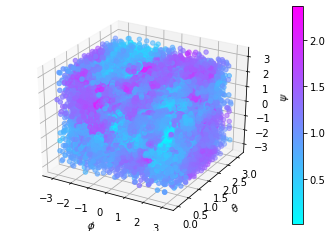

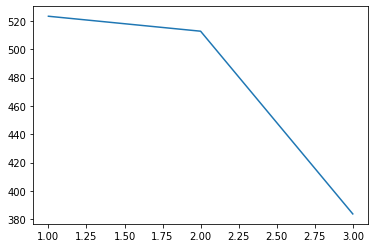

In [8]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
               num_imgs=num_imgs,
               snr=snr,
              #  results_folder=results_folder #?
               )
